# ASL Training Data Pre-processing

Hello! In this file, I will pre-process training data that will be used to train a model to interpret ASL characters.


## Steps
1. Import necessary packages and libraries.
2. Explore the image dataset to see how the MediaPipe hands recognizes the hand landmarks.
3. Extract landmarks from all of the images and create the training DataFrame.
4. Apply any transformations (if needed) and perform some minor EDA.
5. Save the training Dataframe as a CSV file in the processed_data folder

### Importing Libraries
* MediaPipe - this is a library used to detect hand "landmarks". This is what I will use to extract data from the training images.
* OpenCV (cv2) - this is a Computer Vision library that I will use to handle images.
* Pandas - this is a widely used library for handling data. It is very powerful and I will be using it as a result.
* NumPy - this is a popular library used for handling arrays. In this case, all of the data extracted from the images will be in the form of arrays.
* MatPlotLib - a popular and easy to use plotting library. I will be using this to initially troubleshoot and ensure that MediaPipe is correctly detecting landmarks.

In [6]:
import mediapipe as mp
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Initial Exploration of the Dataset

I am going to explore the image data by overlaying the hand landmarks generated by MediaPipe over each image. This will allow us some insight on how well MediaPipe is able to recognize the landmarks. 

The following function sets the following colour convention for the following fingers:

    Thumb: Red
    Index: Green
    Middle: Blue
    Ring: Magenta
    Pinky: Yellow

In [7]:
def process_hand_image(image_path):
    # Read and convert image
    img = cv2.imread(filename=image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Initialize MediaPipe hand detection
    mp_drawing = mp.solutions.drawing_utils
    mp_hand = mp.solutions.hands
    hand = mp_hand.Hands()
    
    # Process the image
    result = hand.process(img_rgb)
    
    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            # Define colors for each finger (RGB format)
            # Format: [knuckles_color, tip_color]
            finger_colors = {
                'thumb': [(255, 0, 0), (255, 128, 128)],      # Red
                'index': [(0, 255, 0), (128, 255, 128)],      # Green
                'middle': [(0, 0, 255), (128, 128, 255)],     # Blue
                'ring': [(255, 0, 255), (255, 128, 255)],     # Magenta
                'pinky': [(255, 255, 0), (255, 255, 128)]     # Yellow
            }
            
            # Define landmark indices for each finger
            finger_landmarks = {
                'thumb': [1, 2, 3, 4],
                'index': [5, 6, 7, 8],
                'middle': [9, 10, 11, 12],
                'ring': [13, 14, 15, 16],
                'pinky': [17, 18, 19, 20]
            }
            
            # Palm landmarks (white color)
            palm_landmarks = [0]  # Wrist
            palm_landmarks.extend([1, 5, 9, 13, 17])  # Base of each finger
            
            # Custom drawing specs
            for finger, landmarks in finger_landmarks.items():
                knuckle_color, tip_color = finger_colors[finger]
                
                # Draw connections for this finger
                for i in range(len(landmarks)-1):
                    current_landmark = landmarks[i]
                    next_landmark = landmarks[i+1]
                    
                    # Create connection style
                    connection_style = mp_drawing.DrawingSpec(
                        color=knuckle_color,
                        thickness=2
                    )
                    
                    # Draw connection
                    start_point = hand_landmarks.landmark[current_landmark]
                    end_point = hand_landmarks.landmark[next_landmark]
                    
                    cv2.line(img_rgb,
                            (int(start_point.x * img_rgb.shape[1]), int(start_point.y * img_rgb.shape[0])),
                            (int(end_point.x * img_rgb.shape[1]), int(end_point.y * img_rgb.shape[0])),
                            connection_style.color,
                            connection_style.thickness)
                
                # Draw landmarks
                for idx in landmarks:
                    # Determine if this is a fingertip
                    is_tip = idx in [4, 8, 12, 16, 20]
                    color = tip_color if is_tip else knuckle_color
                    
                    landmark_style = mp_drawing.DrawingSpec(
                        color=color,
                        thickness=5,
                        circle_radius=2
                    )
                    
                    point = hand_landmarks.landmark[idx]
                    cv2.circle(img_rgb,
                             (int(point.x * img_rgb.shape[1]), int(point.y * img_rgb.shape[0])),
                             landmark_style.circle_radius,
                             landmark_style.color,
                             landmark_style.thickness)
            
            # Draw palm landmarks in white
            for idx in palm_landmarks:
                landmark_style = mp_drawing.DrawingSpec(
                    color=(255, 255, 255),
                    thickness=5,
                    circle_radius=2
                )
                
                point = hand_landmarks.landmark[idx]
                cv2.circle(img_rgb,
                         (int(point.x * img_rgb.shape[1]), int(point.y * img_rgb.shape[0])),
                         landmark_style.circle_radius,
                         landmark_style.color,
                         landmark_style.thickness)
    
    return img_rgb

The following function will call the above colouring function and display the result. Seeing this on the raw pictures will allow us to see what kinds of lighting/conditions

In [8]:
def display_hand(letter, pic_num):
    image_path = "data/raw_data/asl_alphabet_train/asl_alphabet_train/" + letter + "/" + letter + pic_num + ".jpg"
    processed_image = process_hand_image(image_path)
    return processed_image
    # # Display result
    # plt.imshow(processed_image)
    # plt.axis('off')
    # plt.xlabel(letter)
    # plt.show()

Lets now display the hands with the MediaPipe overlay!

I0000 00:00:1738564108.491510  536602 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1738564108.525060  574984 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1738564108.538403  574984 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1738564108.587627  536602 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1
W0000 00:00:1738564108.593759  574994 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1738564108.607001  574995 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1738564108.641321  536602 gl_context

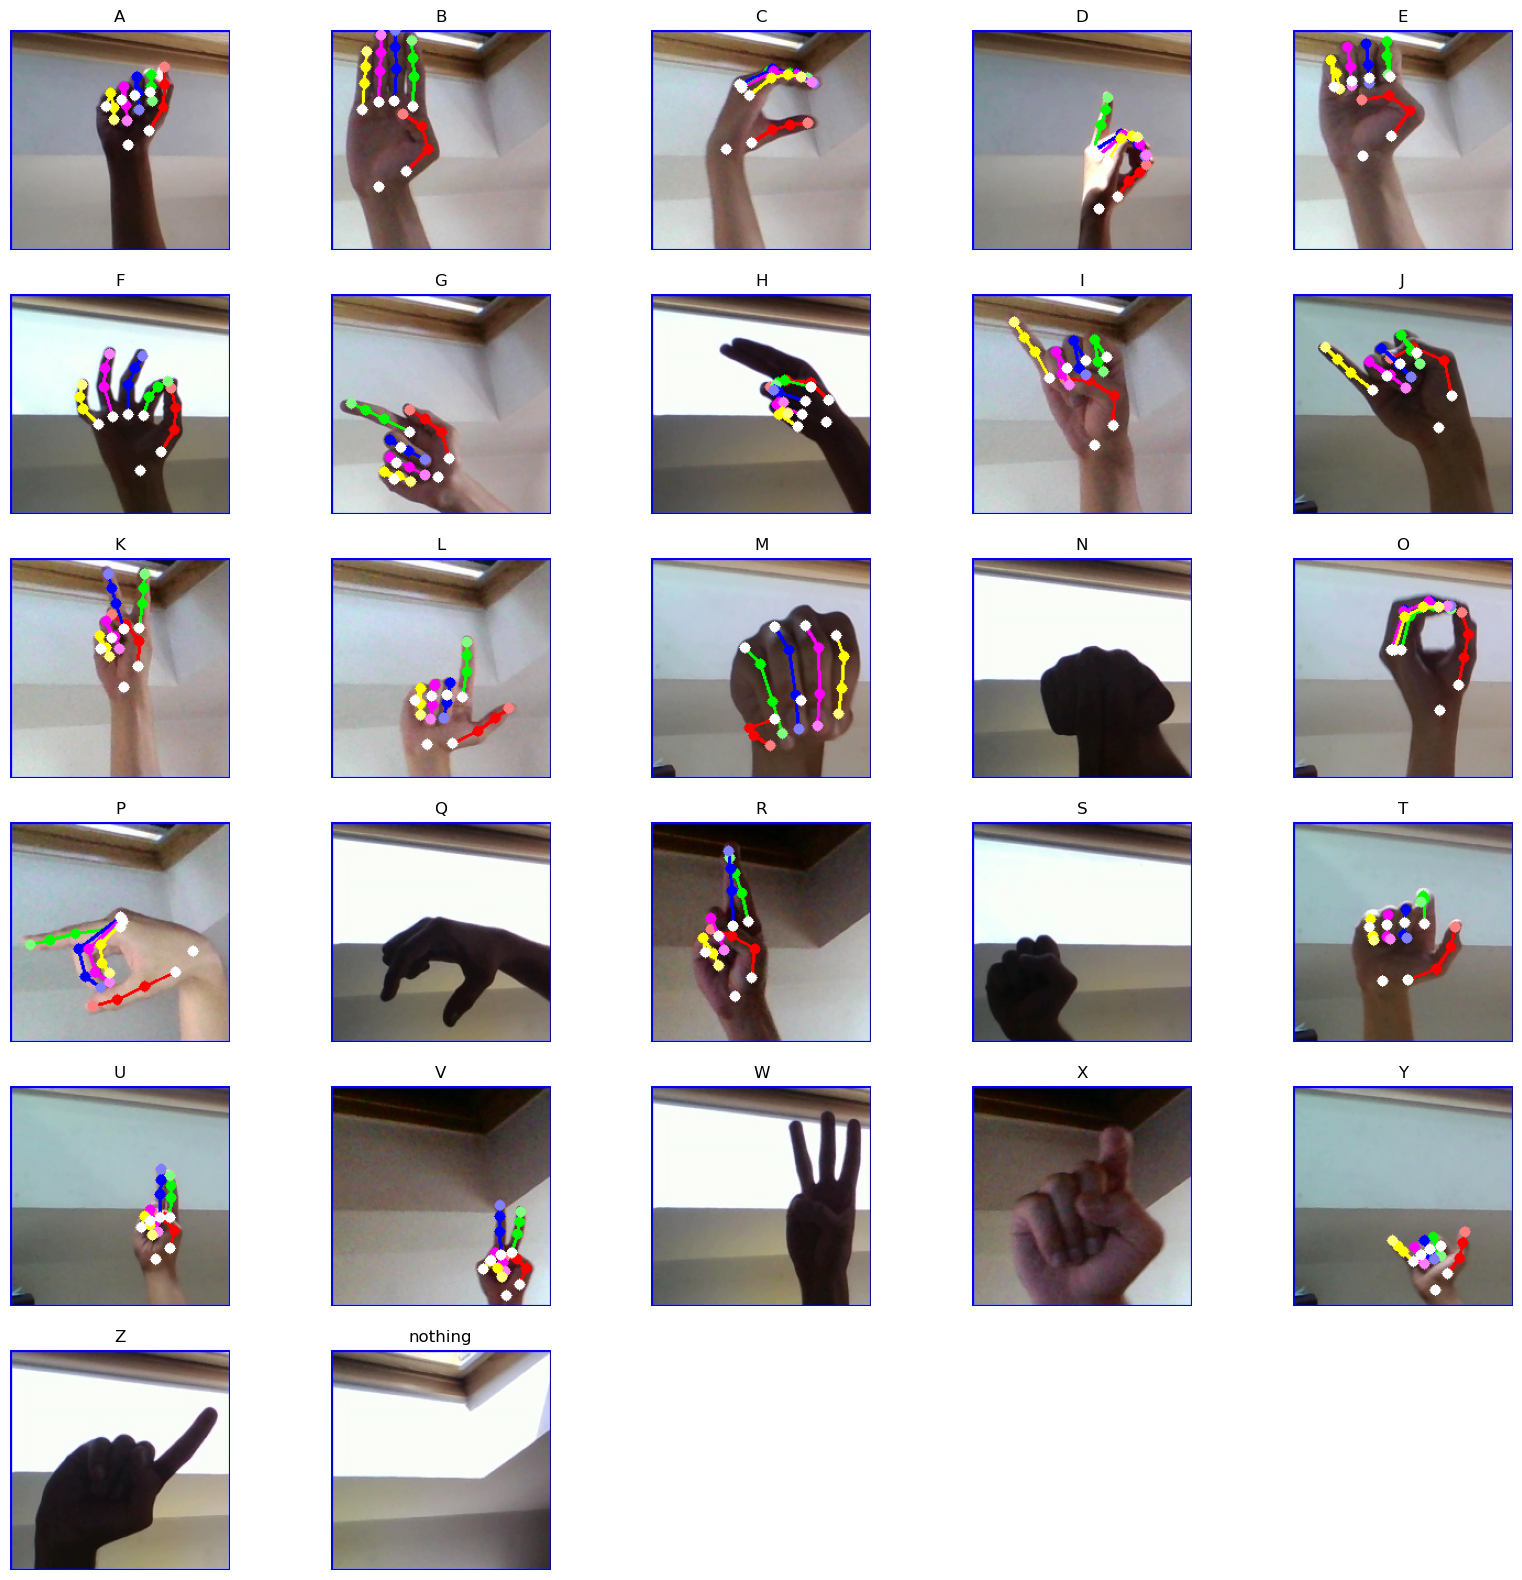

In [13]:
arr = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing']


plt.figure(figsize=(20, 20))

for i in range(len(arr)):
    num = str(random.randint(1, 3000)) # Choosing a random image from the 3000 images each letter has
    img = display_hand(arr[i], num)
    plt.subplot(6, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(arr[i])

*Note: There is ALOT of warnings above the plot. Fear not...these are warnings from MediaPipe since I am using a M1 Mac to run this Jupyter Notebook.*

Now depending on the random image number generated by the code above, we may have some samples of images that are too blurry or too blurry that may be confusing the MediaPipe model. However, looking at the pictures that ARE detected by MediaPipe, it seems to be doing a very good job! Looking at them, it looks like it is correctly colouring each finger as specified in the code above!

## Acknowledgements

The ASL Alphabet letter images are from a Kaggle dataset produced by Akash Nagaraj.


    Dataset: ASL Alphabet
    Author: Akash Nagaraj
    Source: Kaggle
    URL: https://www.kaggle.com/grassknoted/aslalphabet
    DOI: 10.34740/KAGGLE/DSV/29550